<a href="https://colab.research.google.com/github/Just1919/Multiclass-Classification/blob/main/Multiclass_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Multiclass Classification


Now we move on to multiclass classification, where there are n possible outcomes instead of just two.
A classic example is optical character recognition: analyzing a handwritten digit and predicting whether it’s 0 through 9. Another example is face recognition, where a photo is matched against a model trained to identify hundreds of individuals.

Almost everything you learned about binary classification also applies to multiclass classification. In Scikit-learn, any classifier designed for binary problems can also be used for multiclass tasks. This is a major advantage, because many libraries require you to write extra code or use specialized methods to extend algorithms like logistic regression to handle multiple classes. Scikit takes care of this automatically.

For logistic regression, Scikit-learn uses two possible strategies to handle multiclass problems (controlled by the multi_class parameter in LogisticRegression, with the default being 'auto'):

1. Multinomial logistic regression: replaces the logistic (sigmoid) function with a softmax function, producing one probability per class.

2. One-vs-Rest (OvR) / One-vs-All: trains n binary classifiers (one per class). Each model distinguishes one class against all others. At prediction time, the input is evaluated across all n models, and the class with the highest probability is selected.






The one-vs-rest (OvR) approach works well with logistic regression, but for algorithms that can only handle binary classification, Scikit-learn often uses a one-vs-one (OvO) strategy instead. For example, when using the SVC class (Support Vector Machine), Scikit automatically builds a separate model for every possible pair of classes. If your dataset has four classes, this results in six models being created behind the scenes.

You don’t need to worry about these details to train a multiclass classifier, but they help explain why some models consume more memory and take longer to train than others. Certain algorithms, such as Random Forests and Gradient Boosting Machines (GBMs), support multiclass classification natively. For others, Scikit-learn takes care of the extra work transparently so that you don’t have to.

In short: all Scikit-learn classifiers can handle both binary and multiclass classification, which keeps your code simple and lets you focus on building and training your models rather than dealing with the algorithm’s internal mechanics.

### Building a Digit Recognition Model

Want to try out multiclass classification in practice? Let’s build a model that looks at scanned images of handwritten digits and predicts which digit (0–9) each image represents. The U.S. Postal Service developed a similar system years ago to recognize handwritten ZIP codes as part of their mail-sorting automation.

For our example, we’ll use a dataset included with Scikit-learn: the Optical Recognition of Handwritten Digits dataset from the University of California, Irvine. It contains nearly 1,800 digit samples, each represented as an 8 × 8 grid of values ranging from 0 to 16, where higher values correspond to darker pixels.

We’ll apply logistic regression to make predictions with this data. Figure 3-7 displays the first 50 digits from the dataset


In [4]:
#Import libraries
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

In [3]:
digits=load_digits()
print("digit.images: "+str(digits.images.shape))
print("digit.data: "+str(digits.data.shape))
print("digit.target: "+str(digits.target.shape))

digit.images: (1797, 8, 8)
digit.data: (1797, 64)
digit.target: (1797,)


In [6]:
#Plot the digits
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [8]:
digits.images[1]

array([[ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  3., 15., 16.,  6.,  0.,  0.],
       [ 0.,  7., 15., 16., 16.,  2.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  3.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  1., 16., 16.,  6.,  0.,  0.],
       [ 0.,  0.,  0., 11., 16., 10.,  0.,  0.]])

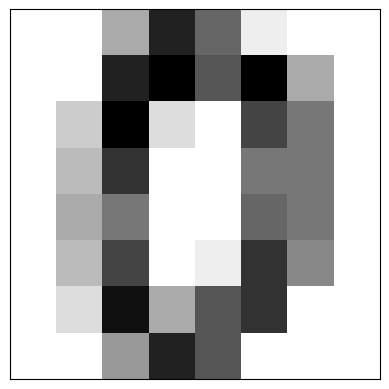

In [10]:
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False, labelbottom=False, labelleft=False)
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)

In [11]:
#The label
digits.target[0]

np.int64(0)

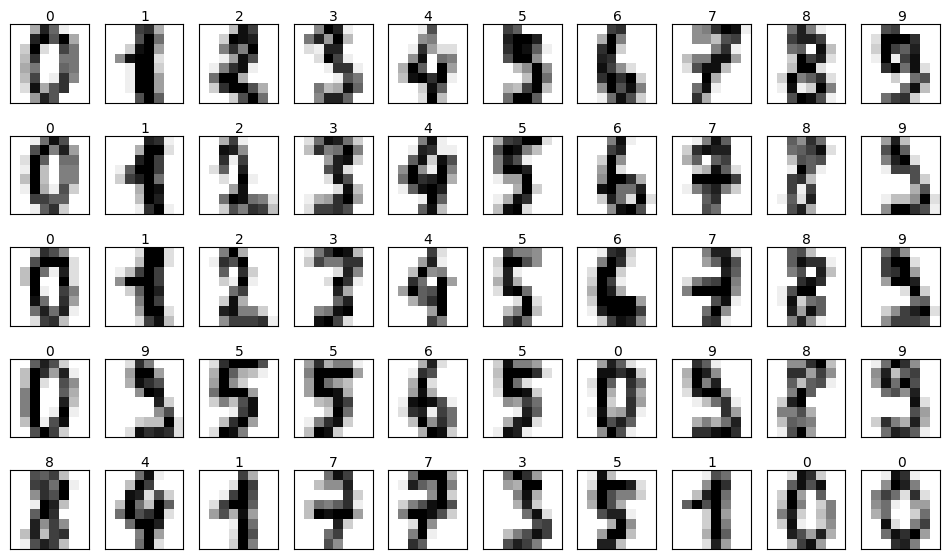

In [12]:
fig, axes = plt.subplots(5, 10, figsize=(12, 7),subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
  ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
  ax.text(0.45, 1.05, str(digits.target[i]), transform=ax.transAxes)

(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

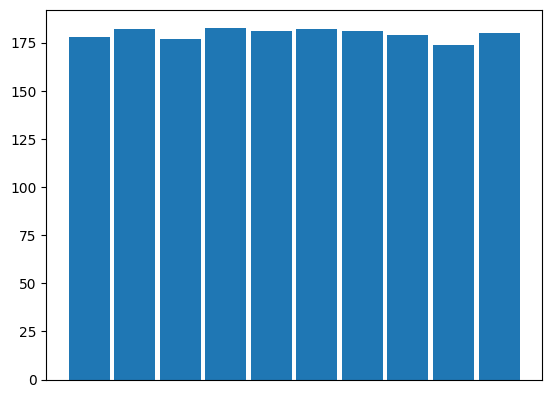

In [15]:
#Distribution of classes
plt.xticks([])
plt.hist(digits.target,  rwidth=0.9)
